# Data Collection

In [27]:
# Normal Python Libraries
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

# For feature engineering
from collections import Counter
import nltk
from nltk.corpus import stopwords
import re

# For feature extraction
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

# Training model and model evaluation
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Used ml models
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report

In [28]:
df = pd.read_csv("C:/Users/KIIT0001/Desktop/MAHASWETA/ML-INTERNSHIP/Spam_SMS_prediction/spam.csv",encoding="latin-1")  
df = df[['v1', 'v2']]  
df.columns = ['label', 'message']  # Renaming columns for clarity
df.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


# Data Preprocessing

In [29]:
df.shape

(5572, 2)

In [30]:
df.describe()

,label,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [31]:
df.info

<bound method DataFrame.info of      label                                            message
0      ham  Go until jurong point, crazy.. Available only ...
1      ham                      Ok lar... Joking wif u oni...
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...
3      ham  U dun say so early hor... U c already then say...
4      ham  Nah I don't think he goes to usf, he lives aro...
...    ...                                                ...
5567  spam  This is the 2nd time we have tried 2 contact u...
5568   ham              Will Ì_ b going to esplanade fr home?
5569   ham  Pity, * was in mood for that. So...any other s...
5570   ham  The guy did some bitching but I acted like i'd...
5571   ham                         Rofl. Its true to its name

[5572 rows x 2 columns]>

In [32]:
df.isnull().sum()

label      0
message    0
dtype: int64

In [33]:
df['label'] = df['label'].map({'ham': 0, 'spam': 1})
df.head(3)

,label,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...


# Data Visualization

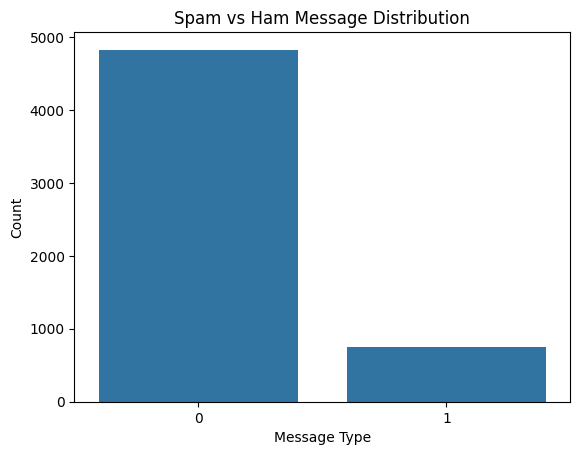

In [60]:
# Class Distribution
sns.countplot(x=df['label'])
plt.title("Spam vs Ham Message Distribution")
plt.xlabel("Message Type")
plt.ylabel("Count")
plt.show()

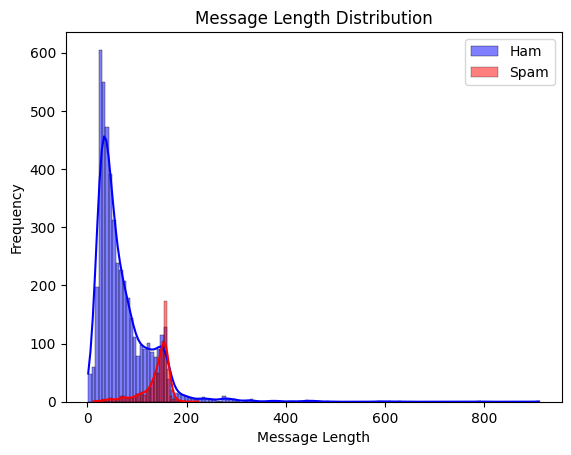

In [58]:
# Message Length Distribution
sns.histplot(df[df['label'] == 0]['message'].apply(len), color="blue", label="Ham", kde=True)
sns.histplot(df[df['label'] == 1]['message'].apply(len), color="red", label="Spam", kde=True)
plt.legend()
plt.title("Message Length Distribution")
plt.xlabel("Message Length")
plt.ylabel("Frequency")
plt.show()

# Feature Engineering

In [38]:
vectorizer = TfidfVectorizer(max_features=5000)
X_tfidf = vectorizer.fit_transform(df['message']).toarray()

In [39]:
vectorizer_bow = CountVectorizer()
X_bow = vectorizer_bow.fit_transform(df['message']).toarray()

# Model Evaluation

# Model 1: Naive Bayes (Using TF-IDF)

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, df['label'], test_size=0.2, random_state=42)

model_nb = MultinomialNB()
model_nb.fit(X_train, y_train)
y_pred_nb = model_nb.predict(X_test)

print("Naïve Bayes Accuracy:", accuracy_score(y_test, y_pred_nb))

Naïve Bayes Accuracy: 0.9713004484304932


# Model 2: Logistic Regression (Using Bag of Words)

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X_bow, df['label'], test_size=0.2, random_state=42)

model_lr = LogisticRegression()
model_lr.fit(X_train, y_train)
y_pred_lr = model_lr.predict(X_test)

print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))

Logistic Regression Accuracy: 0.9775784753363229


# Model 3: SVM (Using TF-IDF)

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, df['label'], test_size=0.2, random_state=42)

model_svm = SVC(kernel='linear')
model_svm.fit(X_train, y_train)
y_pred_svm = model_svm.predict(X_test)

print("SVM Model Accuracy:", accuracy_score(y_test, y_pred_svm))

SVM Model Accuracy: 0.9820627802690582


In [52]:
print("Naive Bayes Results:\n", classification_report(y_test, y_pred_nb))
print("Logistic Regression Results:\n", classification_report(y_test, y_pred_lr))
print("SVM Results:\n", classification_report(y_test, y_pred_svm))

Naive Bayes Results:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98       965
           1       1.00      0.79      0.88       150

    accuracy                           0.97      1115
   macro avg       0.98      0.89      0.93      1115
weighted avg       0.97      0.97      0.97      1115

Logistic Regression Results:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       965
           1       0.99      0.84      0.91       150

    accuracy                           0.98      1115
   macro avg       0.98      0.92      0.95      1115
weighted avg       0.98      0.98      0.98      1115

SVM Results:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       965
           1       0.99      0.87      0.93       150

    accuracy                           0.98      1115
   macro avg       0.99      0.94      0.96      1115
weighted

# Predictive System

In [55]:
input_mail = ["Go until jurong point, crazy.. Available only in Bugis n Great World la e buffet... Cine there got amore wat..."]

# Convert text to feature vectors using the trained TF-IDF vectorizer
input_data_features = vectorizer.transform(input_mail).toarray()

prediction = model_svm.predict(input_data_features)
print("Prediction:", prediction)

if prediction[0] == 0:
    print("Ham SMS")
else:
    print("Spam SMS")

Prediction: [0]
Ham SMS
